In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [62]:
column_names = ["duration", "protocol_type", "service", "flag", "src_bytes",
"dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
"logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
"num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
"is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
"rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
"dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
"dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
"dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "target"
]

In [63]:
df = pd.read_csv("kddcup.data_10_percent.gz", names=column_names)

In [64]:
attacks_types = {
'normal': 'normal', 'back': 'dos', 'buffer_overflow': 'u2r', 
'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l',
'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r',
'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe',
'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe',
'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l',
'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l',
}

In [65]:
df["Attack Type"] = df["target"].apply(lambda types: attacks_types[types[:-1]])

In [46]:
df.shape

(494021, 43)

/tmp/ipykernel_35509/1479851047.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


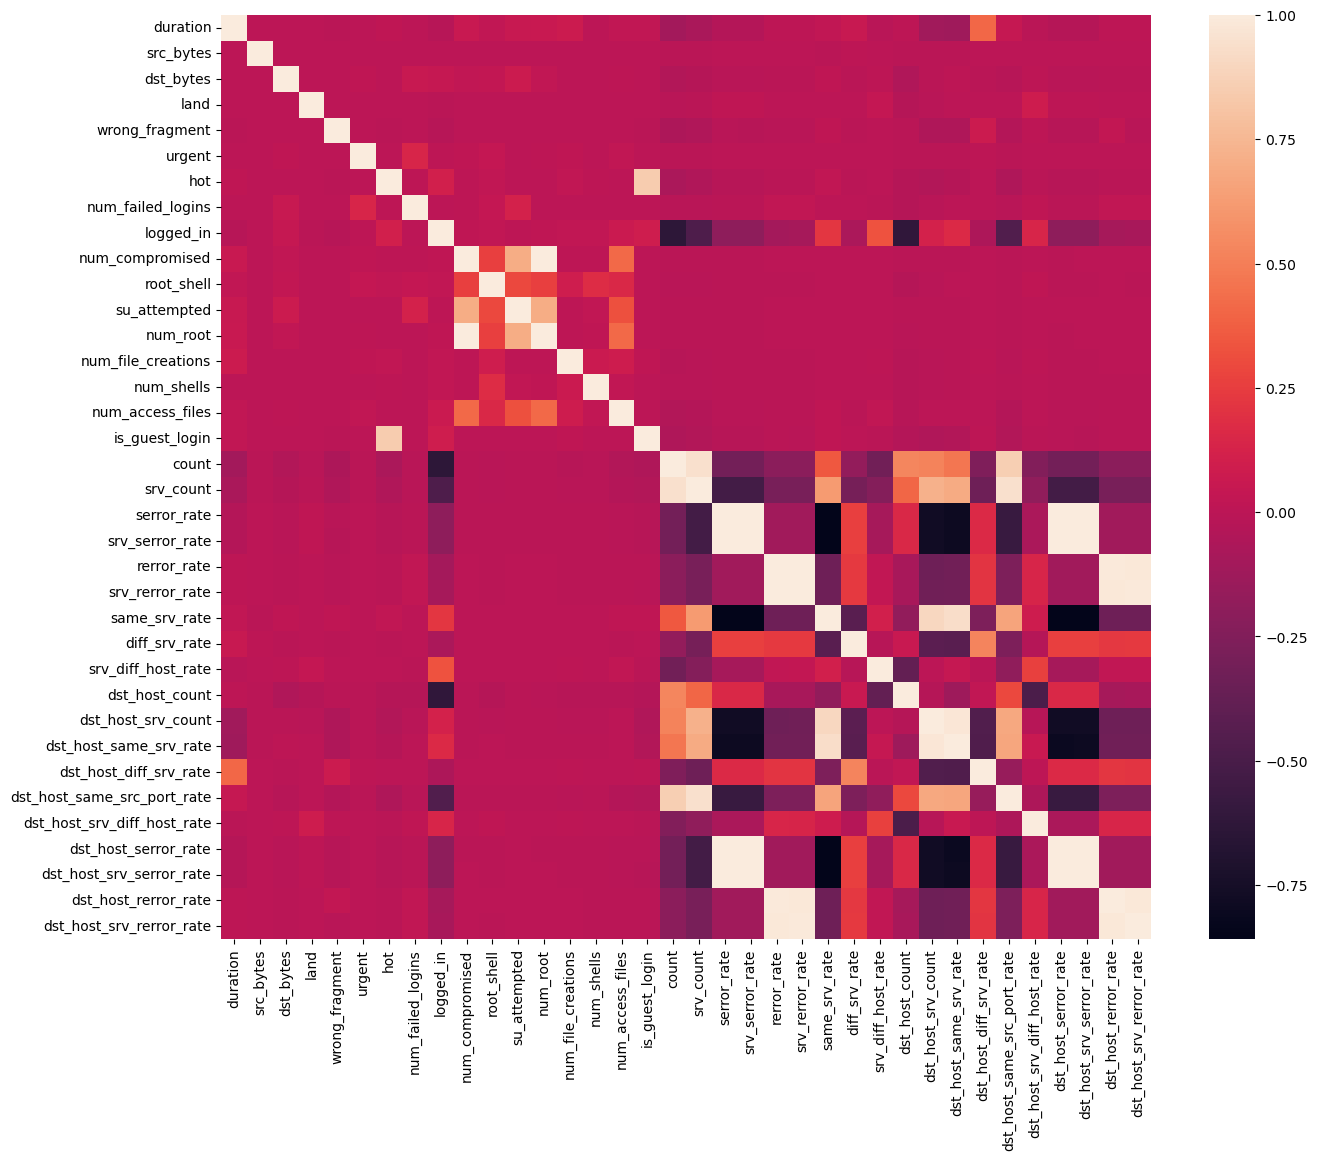

In [49]:
df = df[[col for col in df if df[col].nunique() > 1]]
corr = df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr)
plt.show()

In [52]:
remove_rows = ["num_root", "srv_serror_rate", "srv_rerror_rate", 
               "dst_host_srv_serror_rate", "dst_host_serror_rate", 
               "dst_host_rerror_rate", "dst_host_srv_rerror_rate", 
               "dst_host_same_srv_rate", "service", "target"]

In [53]:
df = df.drop(remove_rows, axis=1)

In [54]:
df["protocol_type"] = df["protocol_type"].map({
    "icmp": 0, "tcp": 1, "udp": 2
})

In [55]:
df["flag"] = df["flag"].map({
    'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 
    'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10
})

In [56]:
X = df.drop(["Attack Type"], axis=1)
y = df[["Attack Type"]]

In [57]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
rf_model = RandomForestClassifier(n_estimators=30)
rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=30)

In [60]:
y_pred = rf_model.predict(X_train)

In [61]:
print("Train score is: ", rf_model.score(X_train, y_train))
print("Test score is: ", rf_model.score(X_test, y_test))

Train score is:  0.9999728091747887
Test score is:  0.999662632570065


In [66]:
pickle.dump(sc, open("sc.pkl", "wb"))

In [67]:
pickle.dump(rf_model, open("rf.pkl", "wb"))

In [68]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [73]:
df["duration"].value_counts()

0        481671
1          2476
2           870
3           625
5           554
          ...  
18185         1
4283          1
2154          1
1007          1
120           1
Name: duration, Length: 2495, dtype: int64